### **数据无量纲化**

无量纲化：将不同规格的数据转换到同一规格，或不同分布的数据转换到某个特定分布

> 例如梯度和矩阵为核心的算法中，逻辑回归、支持向量机、神经网络，无量纲化可以加快求解速度；而在距离类模型，例如K近邻、K-Means聚类，无量纲化可以帮我们提升模型精度，避免某一个取值范围特别大的特征对距离计算造成影响。
决策树和树的集成算法是特例，**对决策树我们不需要无量纲化，决策树可以把任意数据都处理得很好**


数据的无量纲化可以是线性的，也可以是非线性的。

线性的无量纲化包括：

* 中心化处理（Zero-centered或者Mean-subtraction）    
    中心化的本质是让所有记录减去一个固定值，即让数据样本数据平移到某个位置
* 缩放处理（Scale）    
    缩放的本质是通过除以一个固定值，将数据固定在某个范围之中（取对数也算是一种缩放处理）


### 数据归一化 preprocessing.MinMaxScaler      
数据归一化(Normalization，又称Min-Max Scaling)：当数据(x)按照最小值中心化后，再按极差（最大值 - 最小值）缩放，数据移动了最小值个单位，并且会被收敛到 [0,1] 之间。

归一化之后的数据服从正态分布，公式如下：  
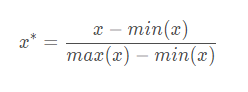


注意区分 归一化 和 正则化    
Normalization是归一化，不是正则化；正则化(Regularization) 不是数据预处理的一种手段

在sklearn当中，我们使用preprocessing.MinMaxScaler来实现数据归一化功能。

它有一个重要参数feature_range，控制我们希望把数据压缩到的范围，默认是[0,1]

In [3]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

In [4]:
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [5]:
# 实现归一化
scaler = MinMaxScaler()
scaler = scaler.fit(data)  # 这里本质是生成min(x),max(x)
result = scaler.transform(data)  # 通过接口导出数据
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [6]:
result_ = scaler.fit_transform(data)  # 训练导出一步到位
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [7]:
scaler.inverse_transform(result)  # 将归一化的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [8]:
# 使用MinMaxScaler的参数feature_range 实现将数据归一化到[0,1]以外的范围中  
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler(feature_range=(5,10))
result = scaler.fit_transform(data)
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [9]:
# 当X中的特征数量非常多的时候,fit会报错并表示,数据量太大计算不了
# 此时使用partial_fit作为训练接口  
# scaler = scaler.partial_fit(data)

**使用numpy实现归一化**


In [11]:
import numpy as np
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
x = np.array(data)
# 归一化
x_nor= (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [12]:
# 逆转归一化
x_returned = x_nor * (x.max(axis=0)-x.min(axis=0)) + x.min(axis=0)
x_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

### 数据标准化 preprocessing.StandardScaler

数据标准化(Standardization，又称Z-score normalization)：当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分布），公式如下：    
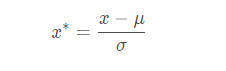

In [13]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [14]:
scaler = StandardScaler() #实例化
scaler.fit(data) #fit，本质是生成均值和方差

StandardScaler()

In [15]:
scaler.mean_ #查看均值的属性mean_

array([-0.125,  9.   ])

In [16]:
scaler.var_ #查看方差的属性var_

array([ 0.546875, 35.      ])

In [17]:
x_std = scaler.transform(data) #通过接口导出结果

数据就会服从为均值为0，方差为1的正态分布

In [18]:
x_std.mean() #导出的结果是一个数组，用mean()查看均值


0.0

In [19]:
x_std.std() #用std()查看方差


1.0

In [20]:
scaler.fit_transform(data) #使用fit_transform(data)一步达成结果

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [21]:
scaler.inverse_transform(x_std) #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

对于StandardScaler和MinMaxScaler来说，空值NaN会被当做是缺失值，
* 在fit的时候忽略
* 在transform的时候保持缺失NaN的状态显示   

尽管去量纲化过程不是具体的算法，但在fit接口中，依然只允许导入至少二维数组，一维数组导入会报错。通常来说，我们输入的X会是我们的特征矩阵，现实案例中特征矩阵不太可能是一维所以不会存在这个问题。


### StandardScaler 和 MinMaxScaler 如何选择？

看情况     
* 大多数机器学习算法中，会选择StandardScaler进行特征缩放，因为MinMaxScaler对异常值非常敏感
* 在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择

MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。

建议先试试看StandardScaler，效果不好换MinMaxScaler。

除了StandardScaler和MinMaxScaler之外，sklearn中也提供了各种其他缩放处理（中心化只需要一个pandas广播一下减去某个数就好了，因此sklearn不提供任何中心化功能）


* 在希望压缩数据，却不影响数据的稀疏性时（不影响矩阵中取值为0的个数时），我们会使用MaxAbsScaler
* 在异常值多，噪声非常大时，我们可能会选用分位数来无量纲化，此时使用RobustScaler

更多详情请参考以下列表：

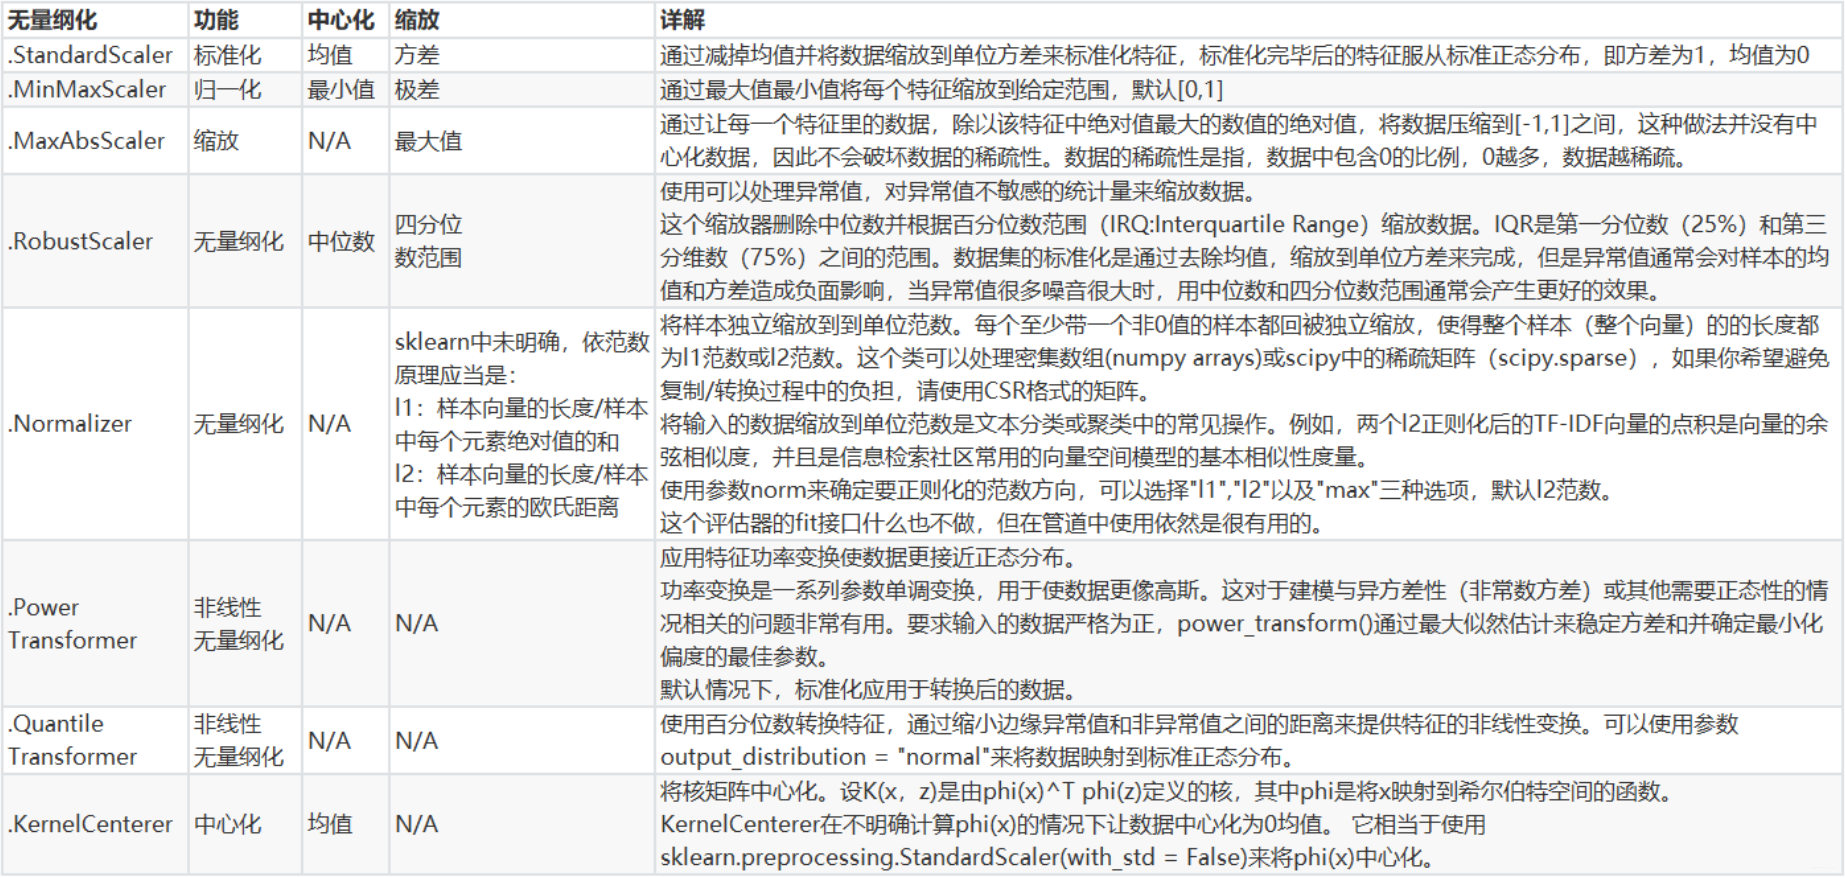